## Importing modules

In [3]:
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('C:/Users/Tarun/Desktop/portfolio-2019-tarun1998/energydata_complete.csv', index_col='date', parse_dates=True)
data.index = data.index.tz_localize('UTC')
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00+00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00+00:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00+00:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00+00:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00+00:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
print("Features: ",data.columns.values)

Features:  ['Appliances' 'lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4'
 'T5' 'RH_5' 'T6' 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out'
 'Press_mm_hg' 'RH_out' 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2']


In [6]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Number of nan values in each feature 

In [7]:
# Finding out number of nan values
for i in data.columns:
    print("Number of NAN in {}: {}".format(i,len(data[np.isnan(data[i])])))

Number of NAN in Appliances: 0
Number of NAN in lights: 0
Number of NAN in T1: 0
Number of NAN in RH_1: 0
Number of NAN in T2: 0
Number of NAN in RH_2: 0
Number of NAN in T3: 0
Number of NAN in RH_3: 0
Number of NAN in T4: 0
Number of NAN in RH_4: 0
Number of NAN in T5: 0
Number of NAN in RH_5: 0
Number of NAN in T6: 0
Number of NAN in RH_6: 0
Number of NAN in T7: 0
Number of NAN in RH_7: 0
Number of NAN in T8: 0
Number of NAN in RH_8: 0
Number of NAN in T9: 0
Number of NAN in RH_9: 0
Number of NAN in T_out: 0
Number of NAN in Press_mm_hg: 0
Number of NAN in RH_out: 0
Number of NAN in Windspeed: 0
Number of NAN in Visibility: 0
Number of NAN in Tdewpoint: 0
Number of NAN in rv1: 0
Number of NAN in rv2: 0


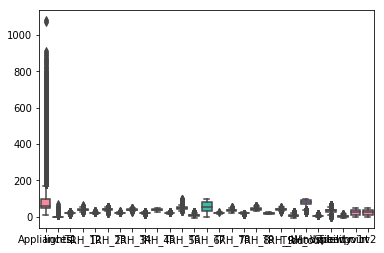

In [8]:
sns.boxplot(data=data.drop(columns='Press_mm_hg'),saturation =1)
plt.show()
plt.figure(figsize=(40,15))

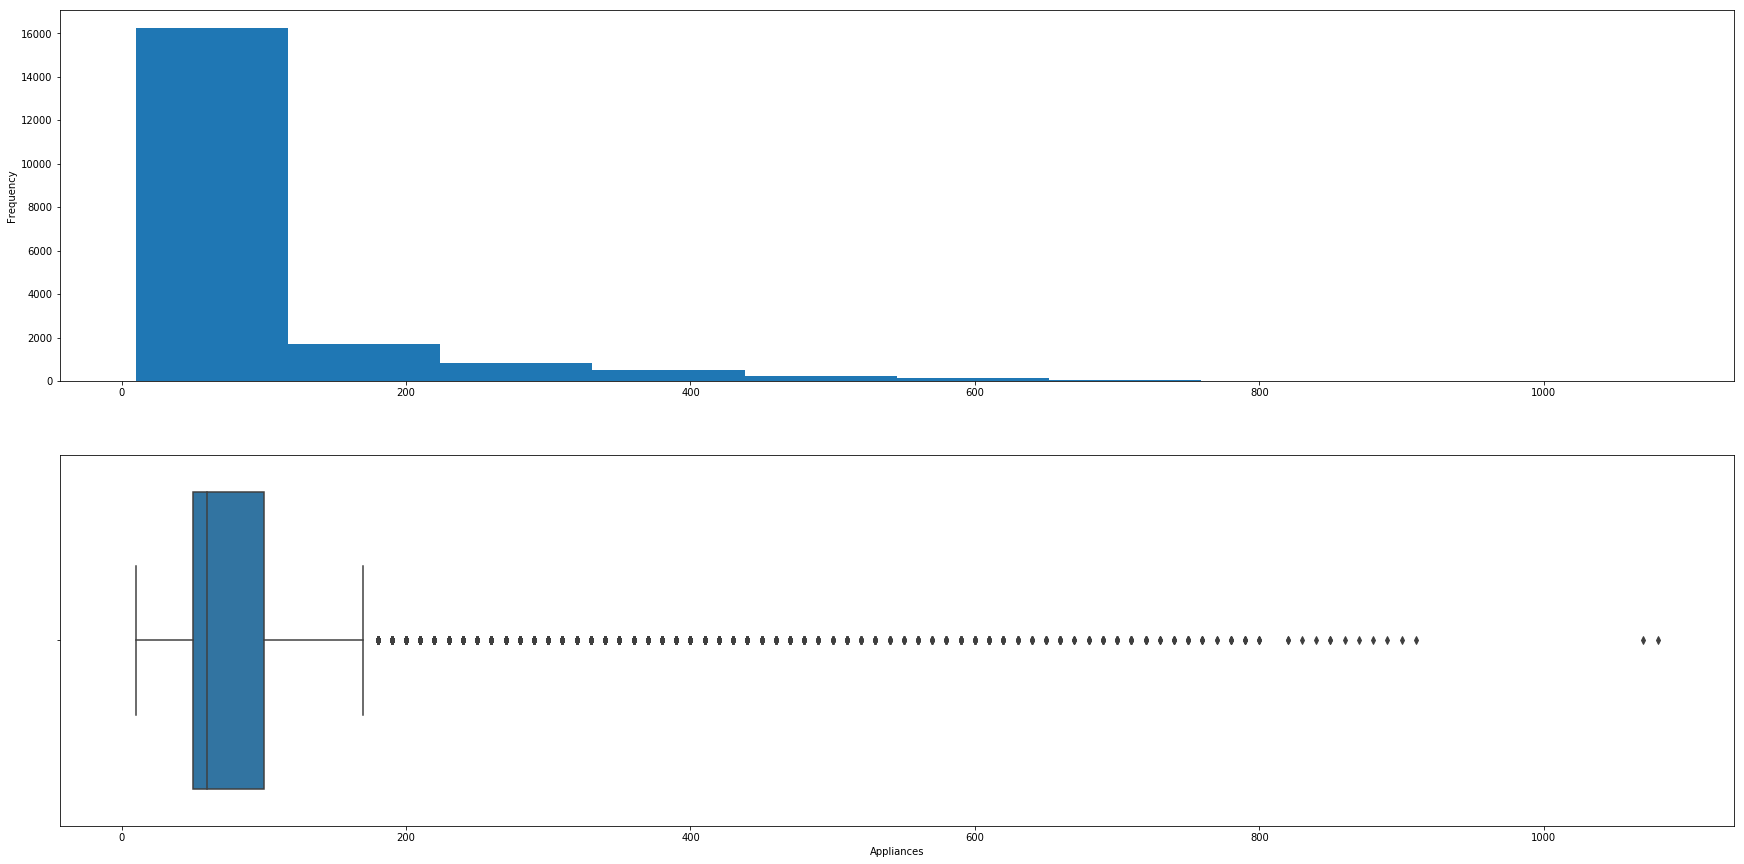

In [9]:
fig,ax=plt.subplots(2,1,figsize=(30,15))
ax[0].hist(data.Appliances)
ax[0].set(ylabel='Frequency')
sns.boxplot(x=data.Appliances,ax=ax[1])
plt.show()
#data.Appliances.values

__Observation__: The data distribution of Appliances i.e Energy consuption has a long tail. In the boxplot, the median is represented with athick black line inside the blue rectangle, and has a value of 60 Wh.The lower whisker has a value of 10 Wh and the upper whisker has a value of 170 Wh. It also shows that the data above the median is more dispersed and that there are several outliers

# Boxplots for Each feature 

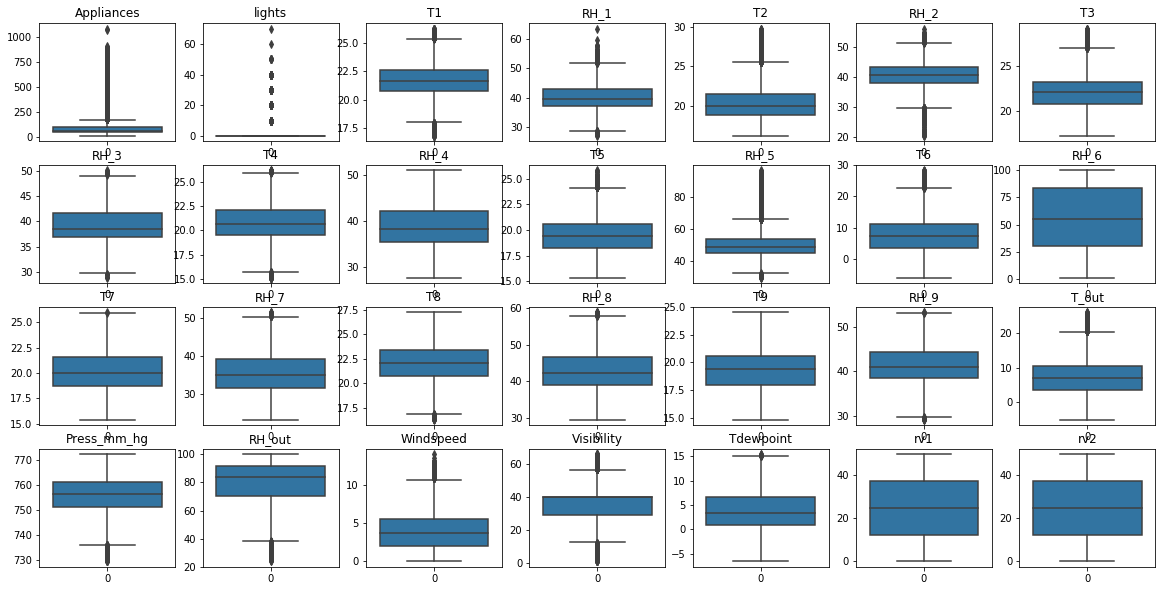

In [10]:
colm=iter(data.columns.values)
fig,ax=plt.subplots(4,7,figsize=(20,10))
for i in range(4):
    for j in range(7):
        y=next(colm)
        sns.boxplot(data=data[y].values,ax=ax[i,j])
        ax[i,j].set_title(y)
plt.show()

__Observation__:
- All the features except rv1,rv2,T9,RH_4,Rh_6 have outliers which impends us to build a good model

# Time Series Analysis- Energy consumption profile for the period

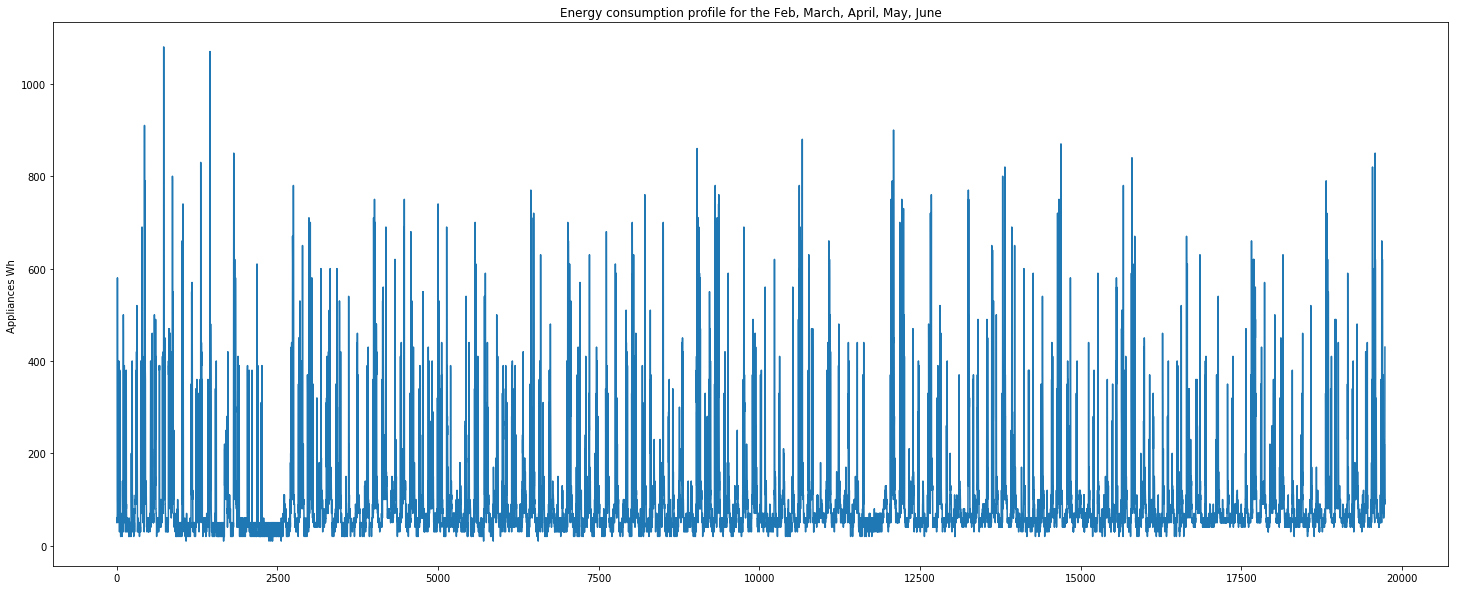

In [42]:
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(data.Appliances.values)
plt.title('Energy consumption profile for the Feb, March, April, May, June')
plt.ylabel('Appliances Wh ')
plt.show()
ax.set(xlabel='common xlabel', ylabel='common ylabel')
#plt.xticks(len(data.Appliances[data.index.month==1]))
majors = [0, 10000, 15000]
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))

__Observation__: 
- The energy consumption profile shows a high variability.
- The energy consumption peaked 1200(approx) in the month of February

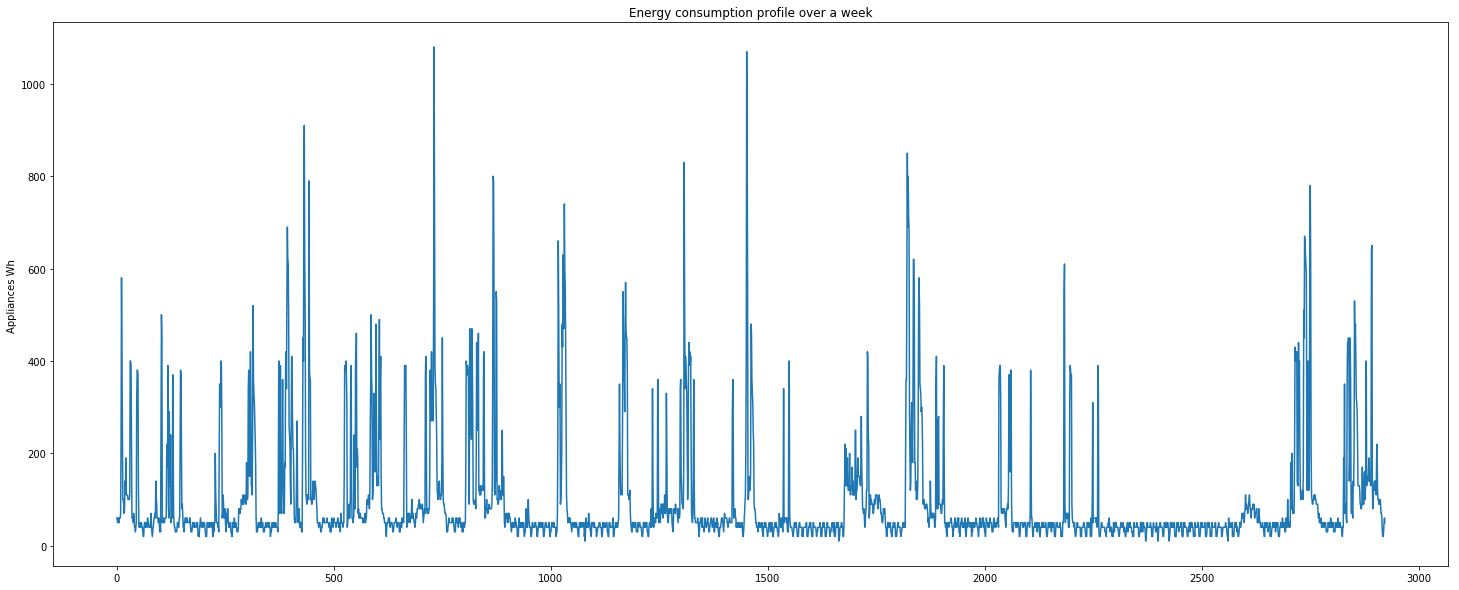

In [44]:
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(data[data.index.month==1].Appliances.values)
plt.title('Energy consumption profile over a week')
plt.ylabel('Appliances Wh ')
plt.show()

__Observation__: 
- The energy consumption profile shows a high variability.

# Pair-wise plot

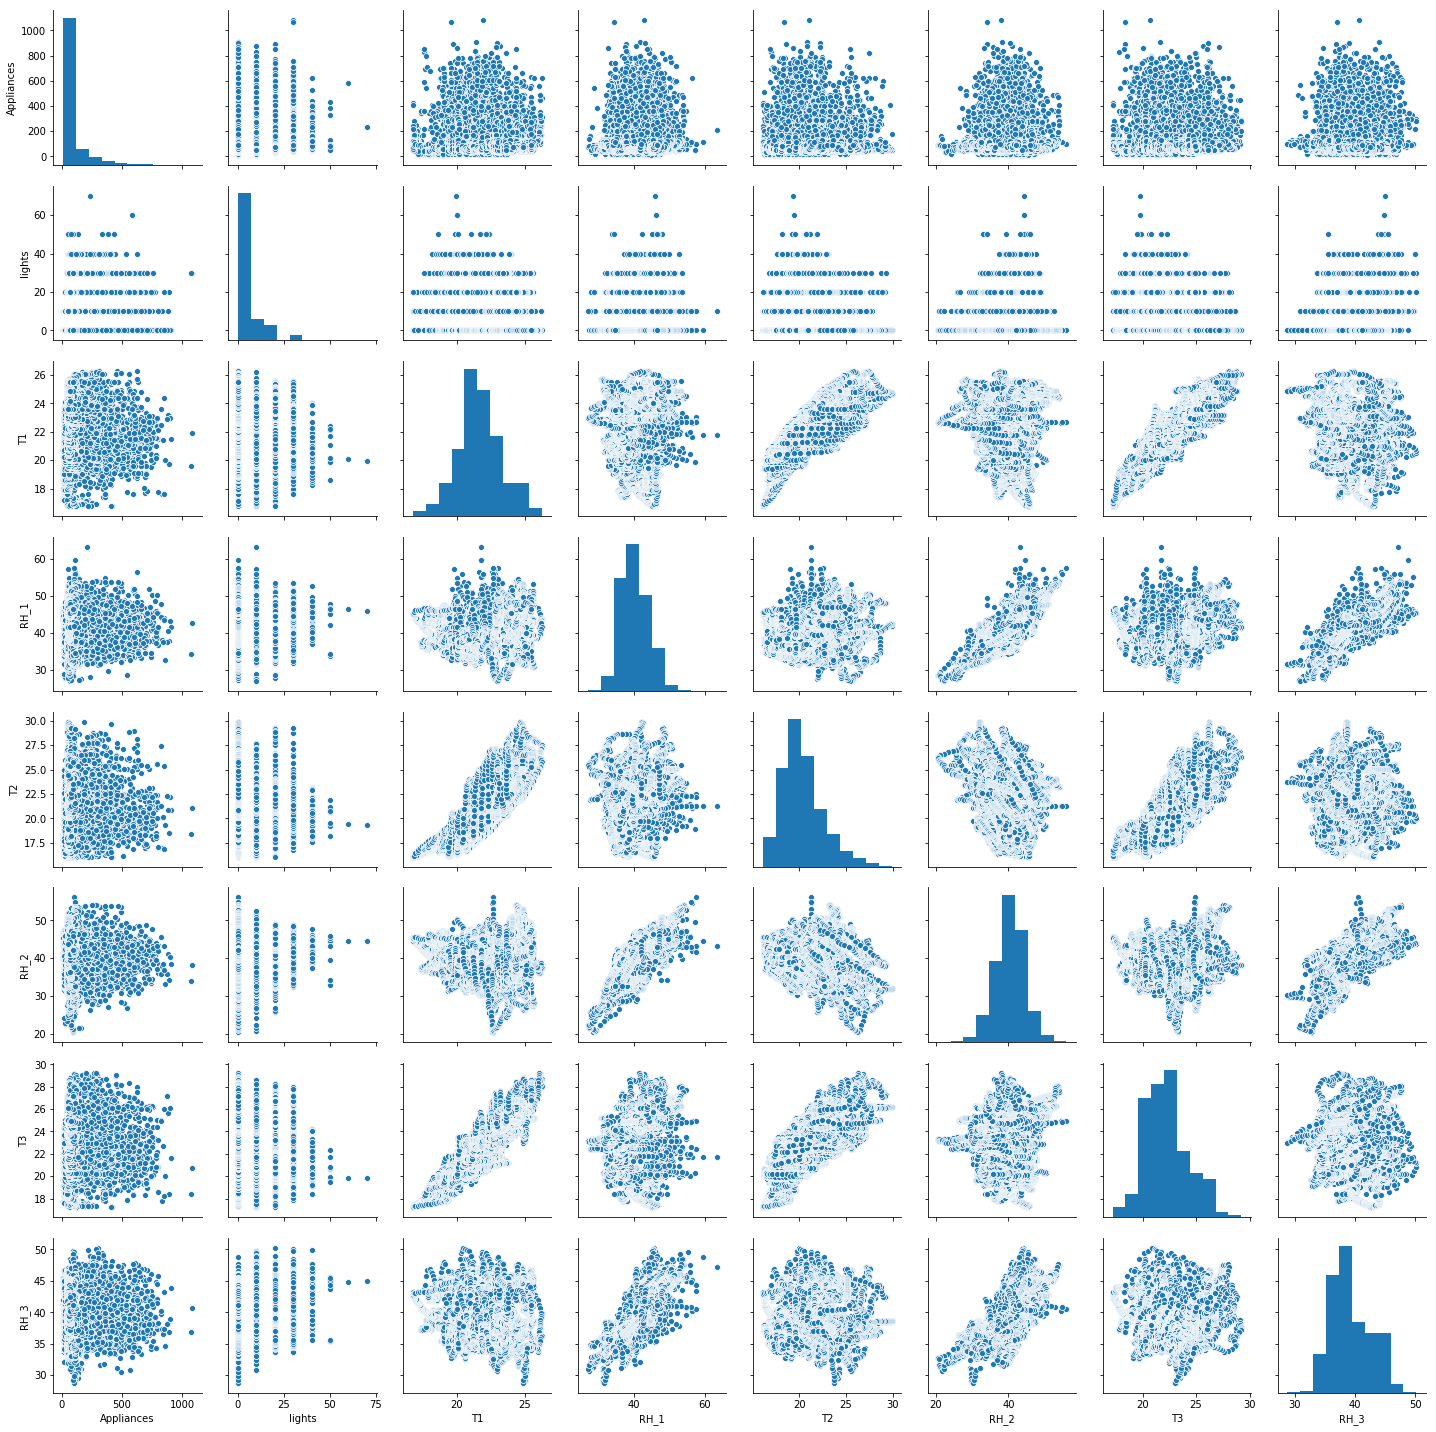

In [13]:
sns.pairplot(data,c=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3'])
plt.show()

In [57]:
from scipy import stats
pairplot1=data[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(pairplot1, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color':'red', 'lw': 1},
            scatter_kws={'color':'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color':'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype':'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), pairplot1.columns):
    ax.set_title(col, y=0.82, fontsize=26)

c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or 

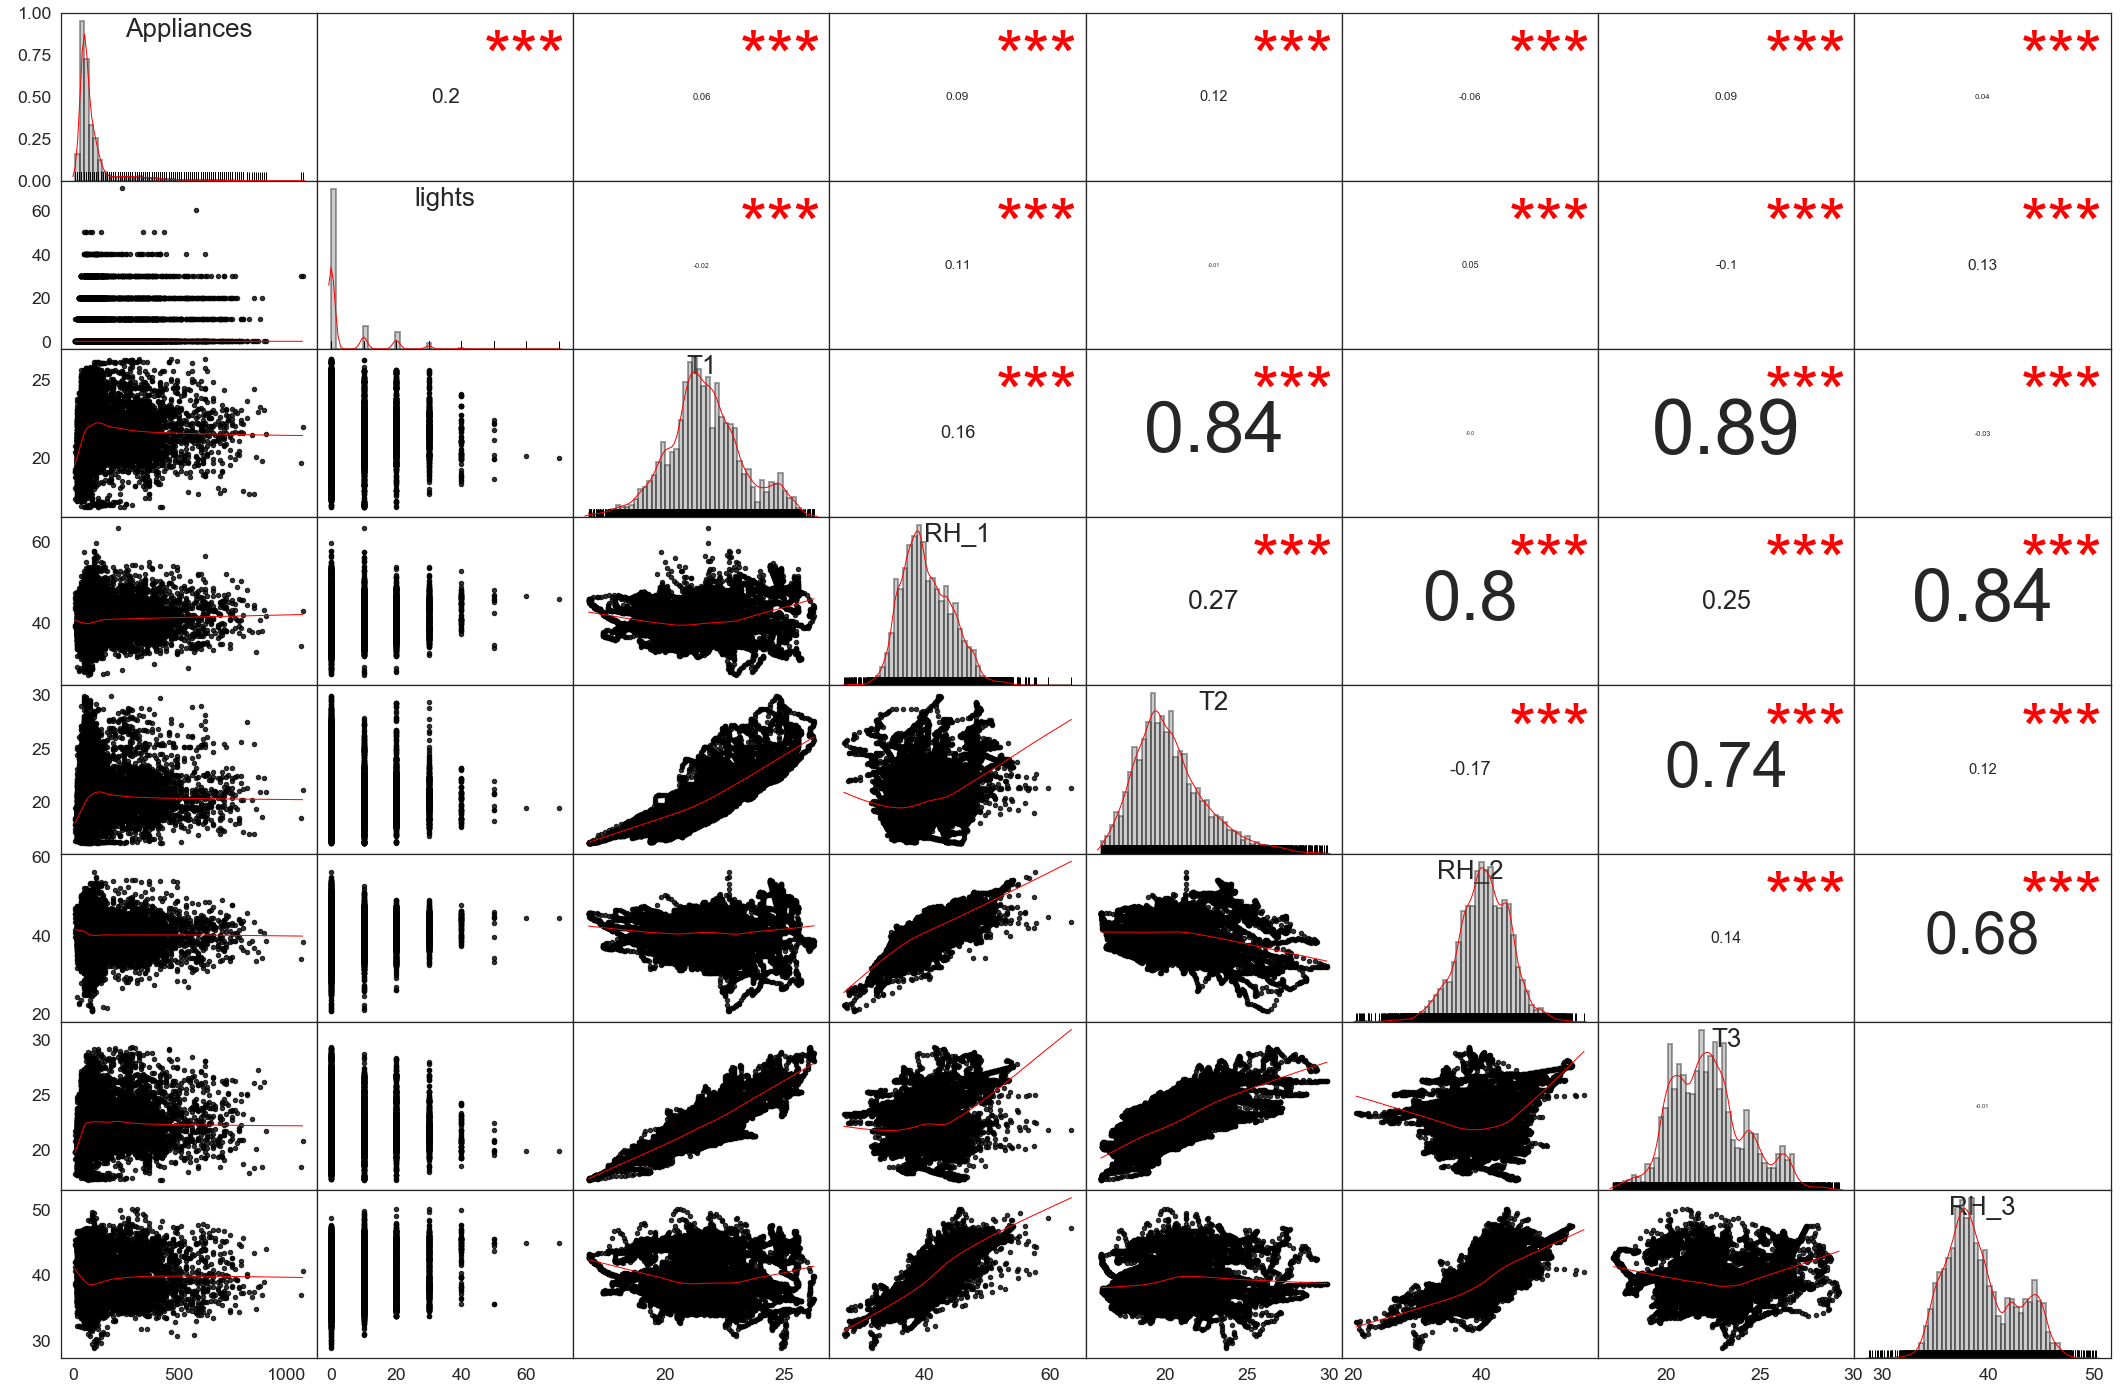

In [58]:
plt.show()

__Observation__:
- There is a positive correlation between theenergy consumption of appliances and lights (0.19). The secondlargest correlation is between appliances and T2. 
- There is also a negative correlation betweenthe appliances and outdoor humidity/RH6.
- A positive correlation of 0.10 is seen between appliances consumption and outdoor temperature (Tout).
- A negative correlation of −0.15 was found with theRHout, and of −0.03 with pressure.
- A positive correlation of  0.84 is seen between T1 and T2.
- A positive correlation of  0.8 is seen between RH_1 and RH_2.
- A positive correlation of  0.89 is seen between T1 and T3.

# Plotting Heatmaps 

In [14]:
data.index.month.unique()

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='date')

In [15]:
dti = pd.to_datetime(pd.date_range(data.index[0], periods=7, freq='D').date)
dti

DatetimeIndex(['2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-16', '2016-01-17'],
              dtype='datetime64[ns]', freq=None)

In [16]:
data["date"]=pd.to_datetime(data.index.date)

In [17]:
def get_engergyconsumption(dti): # gets hourly consumption of energy of appliances in a particular day of a week
    day=pd.DataFrame()
    for i in dti:
        hour=[]
        dat=data[data.date==i]
        for j in range(24):
            hour.append(np.sum(dat[dat.index.hour==j].Appliances))
        day[i.weekday_name]=hour
    day.columns.name='day'
    day.index.name='hour'
    day[np.isnan(day)]=0
    return(day)

## Hourly Energy Consumption of Appliances for four consecutive weeks

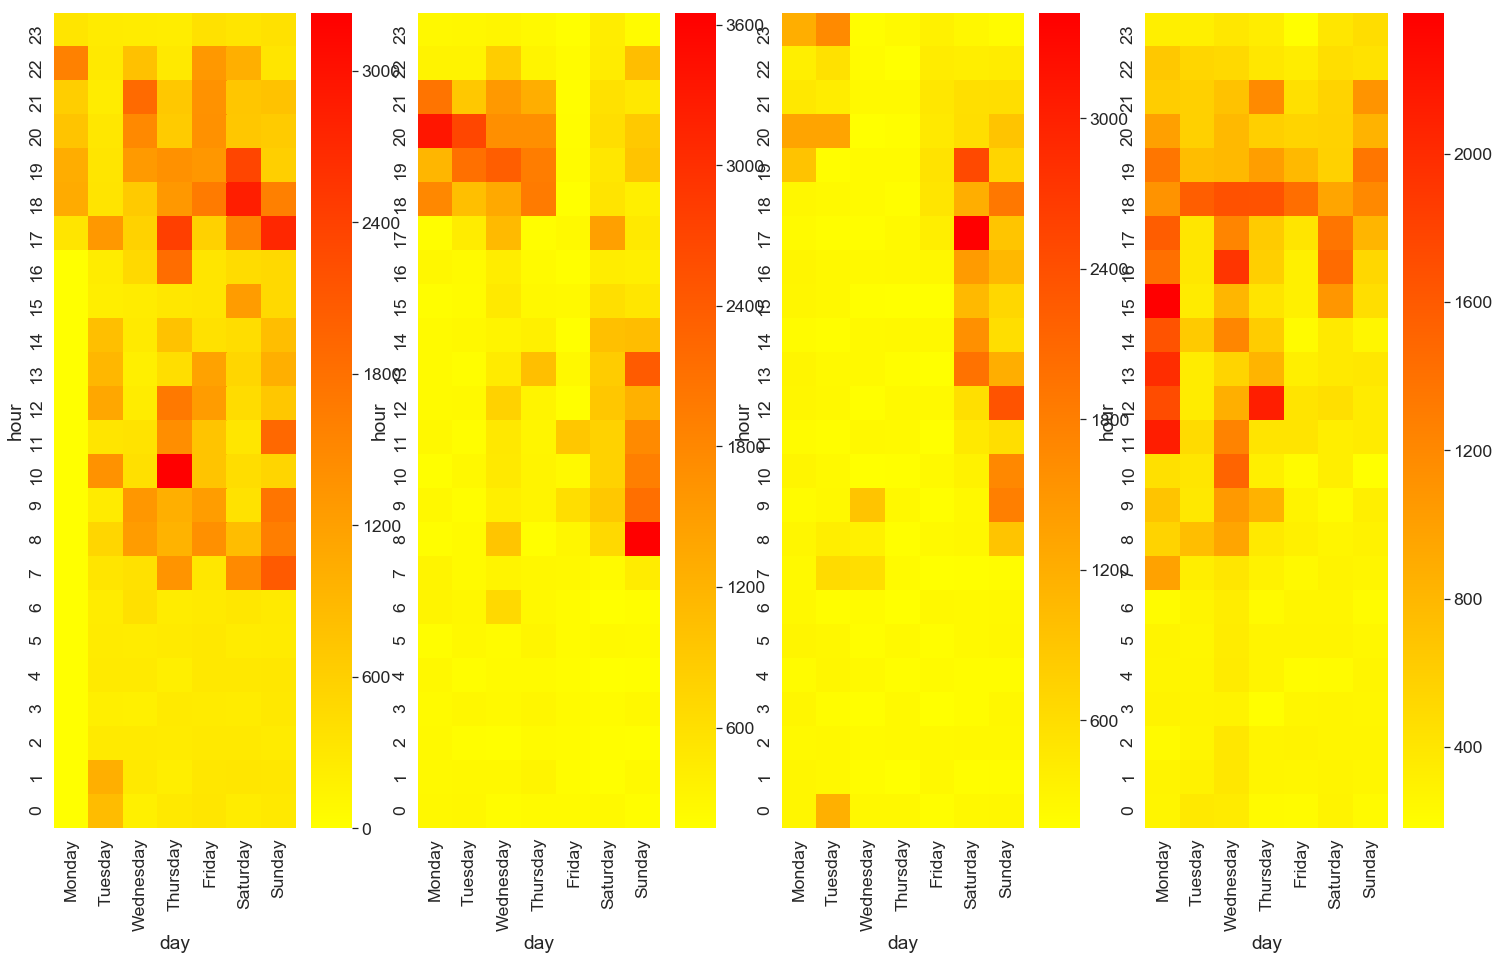

In [52]:
date=pd.to_datetime(data.index.date).unique()[:28]
fig,ax=plt.subplots(1,4,figsize=(25,15))  # Plotting hourly consumption for three consecutive weeks 
for i in range(0,28,7):
    d=get_engergyconsumption(date[i:i+7])[::-1]
    sns.heatmap(d,cmap='autumn_r',ax=ax[int(i/7)])
    #break
plt.show()

__Observation__: The energy consumption seems to be constant in the morning(0-6 am). Then around noon, there are energy loadsurges. The energy demand also increases around 6 pm. There is noclear pattern regarding the day of the week.

In [19]:
for i in data.columns:
    print(i)

Appliances
lights
T1
RH_1
T2
RH_2
T3
RH_3
T4
RH_4
T5
RH_5
T6
RH_6
T7
RH_7
T8
RH_8
T9
RH_9
T_out
Press_mm_hg
RH_out
Windspeed
Visibility
Tdewpoint
rv1
rv2
date


In [20]:
train_data=pd.read_csv("C:/Users/Tarun/Desktop/training.csv")
test_data=pd.read_csv("C:/Users/Tarun/Desktop/testing.csv")
y_test,x_test=test_data["Appliances"],test_data.iloc[:,2:] 
y_train,x_train=train_data["Appliances"],train_data.iloc[:,2:] 

In [21]:
test_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [22]:
train_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


## Dealing with categorical variables

In [23]:
x_test.WeekStatus[x_test.WeekStatus==x_test["WeekStatus"].unique()[0]]=1
x_test.WeekStatus[x_test.WeekStatus==x_test["WeekStatus"].unique()[1]]=0
x_train.WeekStatus[x_train.WeekStatus==x_train["WeekStatus"].unique()[0]]=1
x_train.WeekStatus[x_train.WeekStatus==x_train["WeekStatus"].unique()[1]]=0

c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is sepa

In [24]:
x=x_test.Day_of_week.unique()
for i in range(1,8):
    x_test.Day_of_week[x[i-1]==x_test.Day_of_week]=i
    x_train.Day_of_week[x[i-1]==x_train.Day_of_week]=i

c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\tarun\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

## Residuals and appliances energy consumption plot of the lm model.

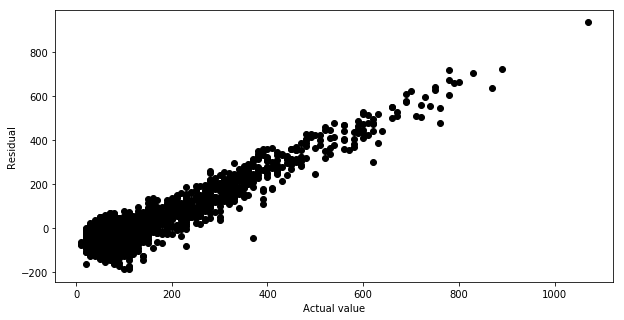

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test-pred,c='black')
plt.xlabel('Actual value')
plt.ylabel('Residual')
plt.show()

__Observation__: The above figure shows a residual plot for the linear regression model.The residuals were computed as the difference between the realvalues and the predicted values. From figure, it is obvious that the relationship between the variables and the energy consumption ofappliances is not well represented by the linear model. The residuals are actually increasing which indicates that the model is not good

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
v=[]
estimator=LinearRegression()
for i in range(len(data.columns)):
    model=RFE(estimator,i+1,1)
    model.fit(x_train,y_train)
    pred_value=model.predict(x_test)
    v.append(rmse(y_test,pred_value))

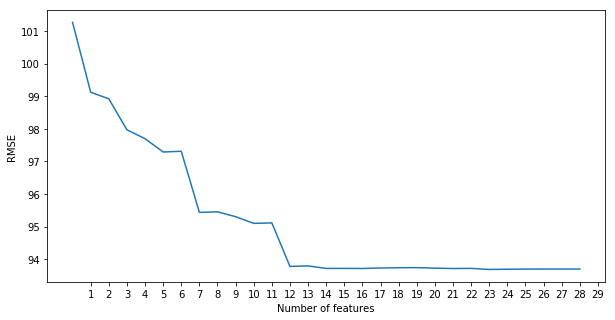

In [32]:
plt.figure(figsize=(10,5))
plt.plot(v)
plt.xticks(range(1,len(data.columns)+1))
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.show()

__Observation__: The above figure is the result of the RFE algorithm over a linear model. The model seems to be more accurate with more number of features. The highest accuracy is marked with considering all 29 features.

In [29]:
def rmse(x,y):
    return(np.sqrt(np.sum(((x-y)**2))/len(x)))